In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Exercise 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time (2).csv


In [ ]:
df = pd.read_csv('delivery_time.csv')

In [ ]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

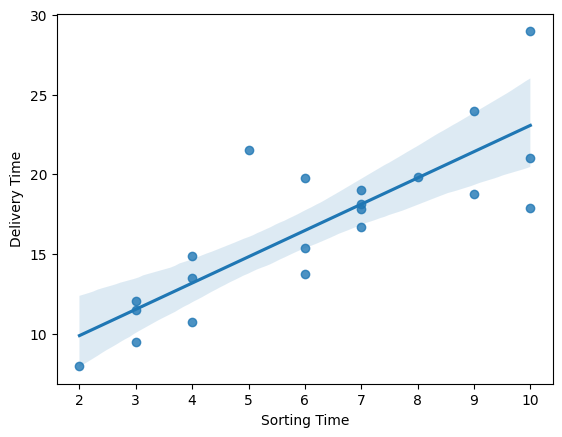

In [ ]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [ ]:
#Since we have to predict delivery time using sorting time, sorting time will be the indepependant variable and delivery time will be dependant variable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
#Since there is a significant change in values from row to row, we need to perform standardization of data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Sorting Time']] = scaler.fit_transform(df[['Sorting Time']])

In [ ]:
df.head()

,Delivery Time,Sorting Time
0,21.00,1.535625
1,13.50,-0.882984
2,19.75,-0.076781
3,24.00,1.132523
4,29.00,1.535625


In [ ]:
x = df['Sorting Time']
y = df['Delivery Time']

In [ ]:
type(x)
type(y)

pandas.core.series.Series

In [ ]:
x_df = x.to_frame(name="Sorting Time")
y_df = y.to_frame(name="Delivery Time")

In [ ]:
x_df.head()

,Sorting Time
0,1.535625
1,-0.882984
2,-0.076781
3,1.132523
4,1.535625


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 0)

In [ ]:
x_train.head()

,Sorting Time
18,-1.689187
6,0.326320
19,0.326320
4,1.535625
2,-0.076781


In [ ]:
y_train.head()

,Delivery Time
18,8.00
6,19.00
19,17.83
4,29.00
2,19.75


In [ ]:
x_test.head()

,Sorting Time
8,1.535625
13,-1.286086
20,-0.479883
1,-0.882984
11,-0.882984


In [ ]:
y_test.head()

,Delivery Time
8,17.90
13,11.50
20,21.50
1,13.50
11,10.75


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Now that we have created our model, we will now predict values for 'delivery time' using the values of the 'sorting time' column

In [ ]:
model.intercept_

array([16.65393903])

In [ ]:
model.coef_

array([[4.87464586]])

In [ ]:
delivery_time_pred = model.predict(x_df)

In [ ]:
delivery_time_pred

array([[24.13956522],
       [12.34970398],
       [16.27965772],
       [22.17458834],
       [24.13956522],
       [16.27965772],
       [18.2446346 ],
       [10.3847271 ],
       [24.13956522],
       [22.17458834],
       [20.20961147],
       [12.34970398],
       [18.2446346 ],
       [10.3847271 ],
       [10.3847271 ],
       [12.34970398],
       [16.27965772],
       [18.2446346 ],
       [ 8.41975023],
       [18.2446346 ],
       [14.31468085]])

In [ ]:
delivery_time_pred_df= pd.DataFrame(delivery_time_pred, columns = ['Pred Delivery Time'])

In [ ]:
delivery_time_pred_df

,Pred Delivery Time
0,24.139565
1,12.349704
2,16.279658
3,22.174588
4,24.139565
5,16.279658
6,18.244635
7,10.384727
8,24.139565
9,22.174588


In [ ]:
#This dataframe is the predicted version of the delivery time column using the sorting time column

# Excercise 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [ ]:
df2 = pd.read_csv('Salary_Data.csv')

In [ ]:
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

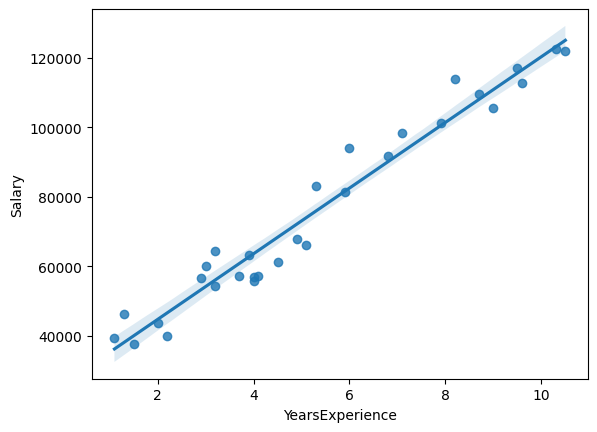

In [ ]:
sns.regplot(x=df2['YearsExperience'],y=df2['Salary'])

In [ ]:
y1 = df2['Salary']
x1 = df2['YearsExperience']

In [ ]:
y1_df = y1.to_frame(name="Salary")
x1_df = x1.to_frame(name="YearsExperience")

In [ ]:
x1_df.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
y1_df.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1_df, y1_df, test_size = 0.2, random_state = 0)


In [ ]:
x_train.head()

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9


In [ ]:
x_test.head()

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5


In [ ]:
y_train.head()

,Salary
27,112635.0
11,55794.0
17,83088.0
22,101302.0
5,56642.0


In [ ]:
y_test.head()

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0


In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Now lets predict for a sample number of 'YearsExperience'

In [ ]:
sample = pd.Series([3,5,6], name = 'sample')
sample_df = sample.to_frame(name = 'YearsExperience')
sample_df

,YearsExperience
0,3
1,5
2,6


In [ ]:
Salary_Hike = model.predict(sample_df)

In [ ]:
Salary_Hike

array([[54717.82453082],
       [73342.97478427],
       [82655.549911  ]])

In [ ]:
Salary_Hike_df = pd.DataFrame(Salary_Hike, columns = ['Pred Salary Hike'])

In [ ]:
Salary_Hike_df

,Pred Salary Hike
0,54717.824531
1,73342.974784
2,82655.549911
